In [95]:
# Establecemos si queremos trabajar de forma local
local = True

In [96]:
# Numero de filas a probar
NROWS = 30

In [97]:
!mkdir -p ./results

In [ ]:
if local:
    # Rutas locales
    PATH = "./Dataset_Huaman_Mendoza_Ramirez.csv"
    EXPORT = "./results/cleanData.csv"
    GRAPHPICTURE = "./results/graph.png"
    GRAPHNODES = "./results/graphNodes.csv"
    GRAPHEDGES = "./results/graphEdges.csv"
    ADJMATRIX = "./results/adjMatrix.txt"
    # Requerimientos
    %pip install pygraphviz
    %pip install networkx --upgrade
    %pip install pydot
    %pip install pydotplus
    %pip install graphviz
    %pip install -U scikit-learn
    %pip install seaborn
    %pip install matplotlib
    %pip install pandas
    %pip install numpy
    %pip install scipy
else:
    from google.colab import drive
    drive.mount("/content/drive")
    # Ruta del drive del equipo
    PATH = "/content/drive/MyDrive/Team 10 Complejidad Algoritmica/Primer entregable/Dataset_Huaman_Mendoza_Ramirez.csv"
    EXPORT = "/content/drive/MyDrive/Team 10 Complejidad Algoritmica/Primer entregable/cleanData.csv"
    GRAPHPICTURE = "/content/drive/MyDrive/Team 10 Complejidad Algoritmica/Primer entregable/graph.png"
    GRAPHPICTURE = "/content/drive/MyDrive/Team 10 Complejidad Algoritmica/Primer entregable/results/graph.png"
    GRAPHNODES = "/content/drive/MyDrive/Team 10 Complejidad Algoritmica/Primer entregable/results/graphNodes.csv"
    GRAPHEDGES = "/content/drive/MyDrive/Team 10 Complejidad Algoritmica/Primer entregable/results/graphEdges.csv"
    ADJMATRIX = "/content/drive/MyDrive/Team 10 Complejidad Algoritmica/Primer entregable/results/results/adjMatrix.txt"

    !apt-get install -y graphviz libgraphviz-dev pkg-config
    %pip install pygraphviz
    %pip install networkx --upgrade

In [99]:
#@title Requeriments
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import graphviz as gv
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
import heapq as hq
import math

In [100]:
#@title Using just our rows
df = pd.read_csv(PATH, usecols=[1, 3, 4, 7, 10, 11, 12, 13, 14, 15, 16], header = 0, nrows = NROWS)
df.head(NROWS)

,Artist,Track,Album,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Gorillaz,Feel Good Inc.,Demon Days,0.818,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559
1,Gorillaz,Rhinestone Eyes,Plastic Beach,0.676,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.695,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014
3,Gorillaz,On Melancholy Hill,Plastic Beach,0.689,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423
4,Gorillaz,Clint Eastwood,Gorillaz,0.663,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953
5,Gorillaz,DARE,Demon Days,0.760,-5.852,0.0372,0.022900,0.086900,0.2980,0.966,120.264
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,0.716,-7.185,0.0629,0.012000,0.262000,0.3250,0.358,127.030
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),0.726,-5.886,0.0313,0.007990,0.081000,0.1120,0.462,140.158
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),0.741,-3.340,0.0465,0.003430,0.103000,0.3250,0.643,120.012
9,Gorillaz,Dirty Harry,Demon Days,0.625,-7.176,0.1620,0.031500,0.081100,0.6720,0.865,192.296


In [101]:
#@title Exporting to csv
df.to_csv(EXPORT, index=True)

In [102]:
#@title Calculando la similitud entre canciones

# Seleccionamos las características que vamos a utilizar
features = ['Danceability', 'Loudness', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Normalizamos los valores de las características
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

<Axes: >

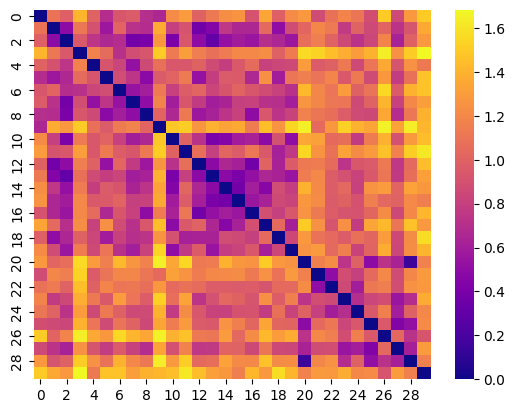

In [103]:
#@title Empleamos un mapa de calor para observar las relaciones entre las canciones
# Creamos la matriz de similitud
similarity_matrix = euclidean_distances(df[features])


# Crear un mapa de calor utilizando Seaborn
sns.heatmap(similarity_matrix, cmap='plasma')


In [104]:
#@title Creacion del grafo con NetworkX
# Crea un grafo vacío
G = nx.Graph()

# Agrega los nodos al grafo
for i in range(len(df)):
    G.add_node(i, track=df.loc[i, 'Track']) #artist=df.loc[i, 'Artist'], track=df.loc[i, 'Track'])


In [105]:
#@title Consideraremos a las aristas como distancias euclidianas

features = df[['Danceability', 'Loudness', 'Speechiness', 'Acousticness', 
               'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].values

threshold = 1.5# Umbral de similitud

# Agrega las aristas al grafo
for i in range(len(df)):
    for j in range(i+1, len(df)):
        dist = euclidean_distances([features[i]], [features[j]])[0][0]
        dist = 2 - dist
        if dist > threshold:
            G.add_edge(i, j, weight=round(dist, 3))


In [106]:
df = pd.read_csv(PATH, usecols=[3], header = 0, nrows = NROWS)
df.to_csv(GRAPHNODES, index=True)
df.head(NROWS)

,Track
0,Feel Good Inc.
1,Rhinestone Eyes
2,New Gold (feat. Tame Impala and Bootie Brown)
3,On Melancholy Hill
4,Clint Eastwood
5,DARE
6,New Gold (feat. Tame Impala and Bootie Brown) ...
7,She's My Collar (feat. Kali Uchis)
8,Cracker Island (feat. Thundercat)
9,Dirty Harry


In [107]:
# Obtener la lista de aristas del grafo
edges = list(G.edges())

# Obtener el diccionario de pesos de las aristas
weights = nx.get_edge_attributes(G, 'weight')

# Crear un dataframe de pandas con las aristas y pesos
df = pd.DataFrame(edges, columns=['source', 'target'])
df['weight'] = df.apply(lambda x: weights[(x['source'], x['target'])], axis=1)

# Exportar el dataframe como un archivo CSV
df.to_csv(GRAPHEDGES, index=False)
df.head(200)

,source,target,weight
0,1,2,1.512
1,1,12,1.638
2,1,13,1.550
3,2,7,1.621
4,2,8,1.595
5,2,10,1.586
6,2,12,1.506
7,2,13,1.693
8,5,8,1.515
9,8,16,1.504


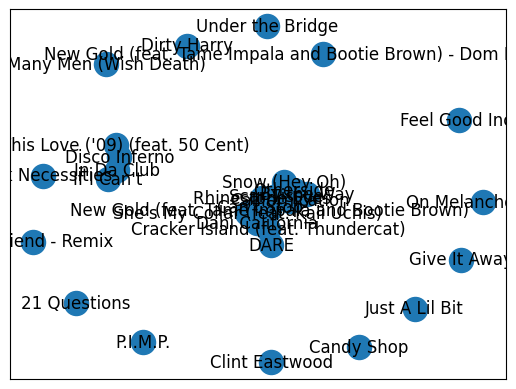

In [108]:
#@title Mostramos el grafo con Matplotlib usando Fruchterman
# Importa la librería de visualización de grafos

# Define la posición de cada nodo
pos = nx.fruchterman_reingold_layout(G)

# Dibuja los nodos y las aristas del grafo
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)

# Agrega etiquetas de nodo
labels = nx.get_node_attributes(G, 'track')
nx.draw_networkx_labels(G, pos, labels)

# Muestra el grafo
plt.show()


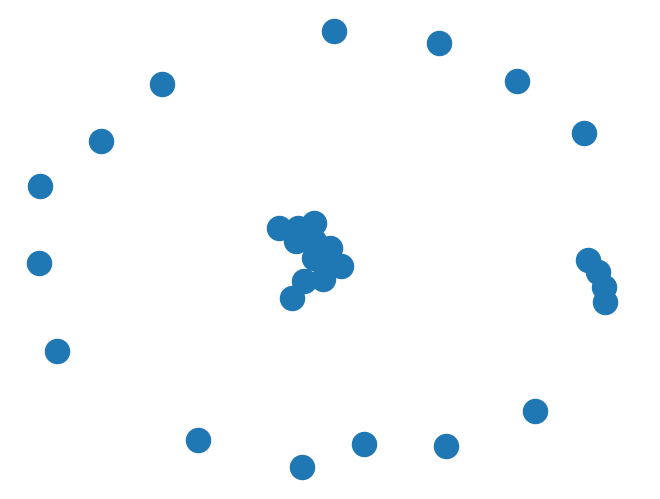

In [109]:
#@title Mostramos el grafo con Matplotlib usando Spring
%matplotlib inline
nx.draw(G,nx.spring_layout(G))

In [110]:
#@title Matriz de adjacencia
# Convertir grafo en una matriz de adyacencia
adj_matrix = nx.to_numpy_array(G)

# Imprimir la matriz de adyacencia
print(adj_matrix)


[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.512 0.    0.    0.    0.    0.    0.    0.    0.    0.
  1.638 1.55  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.   ]
 [0.    1.512 0.    0.    0.    0.    0.    1.621 1.595 0.    1.586 0.
  1.506 1.693 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    1.515 0.    0.    0.
  0.    0.    0.    0.  

In [111]:
#@title Exportar la matriz de adyacencia a un archivo de texto
np.savetxt(ADJMATRIX, adj_matrix, fmt='%d')

In [112]:
num_aristas = G.number_of_edges()
print("El grafo G tiene", num_aristas, "aristas.")

El grafo G tiene 22 aristas.


In [113]:
# Convertir grafo a objeto AGraph
A = nx.nx_agraph.to_agraph(G)

# Generar imagen del grafo con Graphviz
A.draw(GRAPHPICTURE, prog='dot')


In [114]:
#@title Transformar el grafo usando Graphviz
def drawG_am(G, directed=False, weighted=False, path=[], layout="sfdp"):
  graph = gv.Digraph("digrafo") if directed else gv.Graph("grafo")
  graph.graph_attr["layout"] = layout
  graph.edge_attr["color"] = "gray"
  graph.node_attr["color"] = "orangered"
  graph.node_attr["width"] = "0.1"
  graph.node_attr["height"] = "0.1"
  graph.node_attr["fontsize"] = "8"
  graph.node_attr["fontcolor"] = "mediumslateblue"
  graph.node_attr["fontname"] = "monospace"
  graph.edge_attr["fontsize"] = "8"
  graph.edge_attr["fontname"] = "monospace"
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      if weighted:
        graph.edge(str(u), str(v), str(G[u, v]), dir="forward", penwidth="2", color="orange")
      else:
        graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v in range(n):
      draw = False
      if G[u, v] > 0 and not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed:
        draw = True
      if draw:
        if weighted:
          graph.edge(str(u), str(v), str(G[u, v]))
        else:
          graph.edge(str(u), str(v))
  return graph

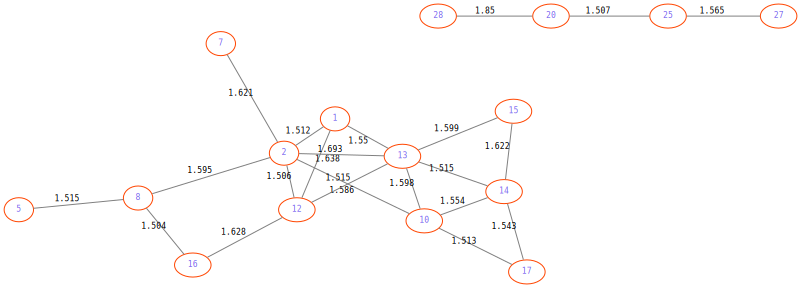

In [115]:
drawG_am(adj_matrix, weighted=True)

In [116]:
def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v in range(n):
        if G[u, v] > 0 and not visited[v]:
          f = g + G[u, v]
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))

  return path, cost

[-1, 13, 10, -1, -1, 8, -1, 2, 2, -1, 14, -1, 13, 14, -1, 14, 12, 14, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[inf, 3.065, 3.14, inf, inf, 6.25, inf, 4.761, 4.735, inf, 1.554, inf, 3.03, 1.515, 0, 1.622, 4.6579999999999995, 1.543, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


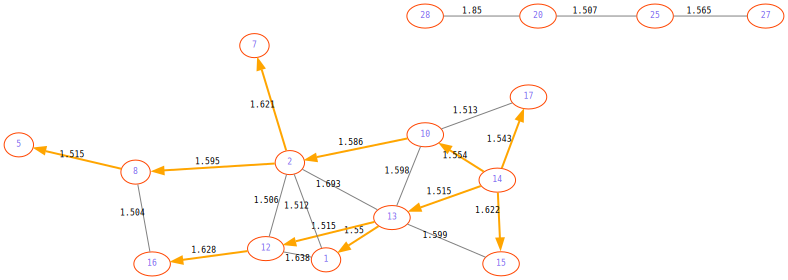

In [117]:
path, cost = dijkstra(adj_matrix, 14)
print(path)
print(cost)
drawG_am(adj_matrix, weighted=True, path=path)